# Figuring Out Which Employees May Quit

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

ModuleNotFoundError: No module named 'pandas_profiling'

### Load hr data

In [2]:
hr_df = pd.read_csv(r"E:\Triloki\Triloki\Udemy\Case_Studies\hr_data.csv")

#shape of df
hr_df.shape

(14999, 9)

In [3]:
# head of df
hr_df.head(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium


In [4]:
# bottom of df
hr_df.tail(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [5]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [6]:
# which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [7]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


### Load employee satisfaction data

In [8]:
emp_satis_eval = pd.read_excel(r"E:\Triloki\Triloki\Udemy\Case_Studies\datascienceforbusiness-master/employee_satisfaction_evaluation.xlsx")

emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [9]:
#shape
emp_satis_eval.shape

(14999, 3)

### Join Tables

In [10]:
main_df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()
main_df.head(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88


### Checking missing values?

In [11]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

### Fill the missing blanks with the aveage values

In [12]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
main_df.fillna(main_df.mean(), inplace=True)
main_df.head(3)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88


In [14]:
main_df.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [15]:
# Removing employee ID
main_df_final = main_df.drop(['employee_id'], axis=1)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


### Displaying Correlation Matrix

No handles with labels found to put in legend.


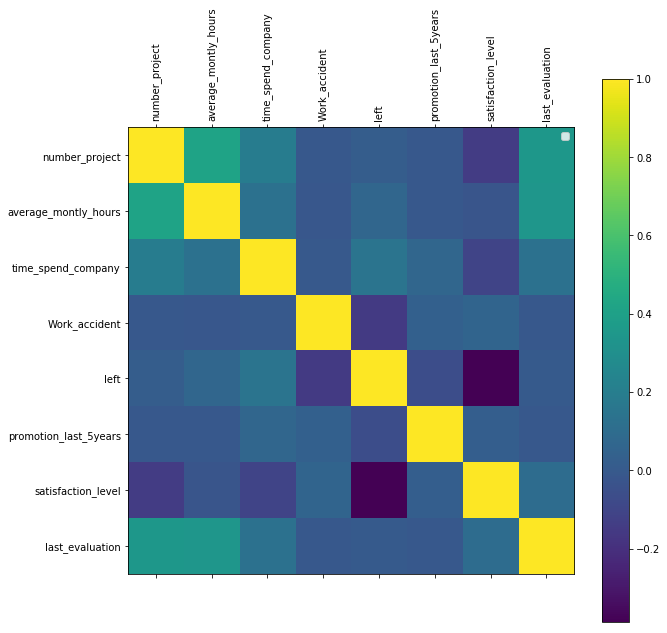

In [16]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
plot_corr(main_df_final)

## Preparing  Dataset for ML

In [17]:
#One Hot Encoding on Categorical Data

categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [18]:
#Shape of main_df_final df
main_df_final.shape

(14999, 19)

In [19]:
# count in class
main_df_final.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [20]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-null 

## Preparing our Dataset for Machine Learning

In [21]:
from sklearn.model_selection import train_test_split

X = main_df_final.drop(['left'],axis=1).values
y = main_df_final['left'].values


In [22]:
# Split data into a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
df_train = pd.DataFrame(X_train)
df_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.465614,-0.727582,0.347339,-0.415862,-0.14999,-1.098616,-0.387259,-0.237368,-0.232629,-0.229657,-0.209146,-0.245106,3.870428,-0.617614,-0.413812,-0.471116,1.032827,-0.875906
1,-1.465614,-1.267985,-0.336335,-0.415862,-0.14999,-0.614069,-1.321789,-0.237368,-0.232629,-0.229657,-0.209146,-0.245106,-0.258369,-0.617614,2.416555,-0.471116,1.032827,-0.875906
2,0.977102,1.093777,-0.336335,-0.415862,-0.14999,-0.250659,-0.971340,4.212863,-0.232629,-0.229657,-0.209146,-0.245106,-0.258369,-0.617614,-0.413812,-0.471116,-0.968216,1.141675


In [25]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,8.038780e-17,2.111317e-16,3.904445e-16,-1.027435e-15,1.490801e-16,3.017112e-14,9.217928e-15,2.370288e-17,-4.730476e-16,-6.929086e-16,1.120742e-15,-1.179999e-15,-2.040890e-18,-1.506875e-16,4.482344e-16,8.058978e-16,-1.122384e-16,1.698486e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.465614e+00,-2.108612e+00,-1.020009e+00,-4.158624e-01,-1.499903e-01,-2.108090e+00,-2.081094e+00,-2.373683e-01,-2.326295e-01,-2.296571e-01,-2.091457e-01,-2.451056e-01,-2.583694e-01,-6.176143e-01,-4.138122e-01,-4.711164e-01,-9.682161e-01,-8.759058e-01
25%,-6.513755e-01,-9.077161e-01,-3.363345e-01,-4.158624e-01,-1.499903e-01,-6.948270e-01,-9.129320e-01,-2.373683e-01,-2.326295e-01,-2.296571e-01,-2.091457e-01,-2.451056e-01,-2.583694e-01,-6.176143e-01,-4.138122e-01,-4.711164e-01,-9.682161e-01,-8.759058e-01
50%,1.628633e-01,-7.044022e-03,-3.363345e-01,-4.158624e-01,-1.499903e-01,1.127516e-01,2.159748e-02,-2.373683e-01,-2.326295e-01,-2.296571e-01,-2.091457e-01,-2.451056e-01,-2.583694e-01,-6.176143e-01,-4.138122e-01,-4.711164e-01,-9.682161e-01,-8.759058e-01
75%,9.771020e-01,8.736132e-01,3.473395e-01,-4.158624e-01,-1.499903e-01,7.991935e-01,8.977189e-01,-2.373683e-01,-2.326295e-01,-2.296571e-01,-2.091457e-01,-2.451056e-01,-2.583694e-01,1.619134e+00,-4.138122e-01,-4.711164e-01,1.032827e+00,1.141675e+00
max,2.605580e+00,2.174584e+00,4.449384e+00,2.404641e+00,6.667100e+00,1.566393e+00,1.657024e+00,4.212863e+00,4.298682e+00,4.354317e+00,4.781356e+00,4.079875e+00,3.870428e+00,1.619134e+00,2.416555e+00,2.122618e+00,1.032827e+00,1.141675e+00


## MAchine Learning

### Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 79.16%
[[3177  230]
 [ 708  385]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3407
           1       0.63      0.35      0.45      1093

   micro avg       0.79      0.79      0.79      4500
   macro avg       0.72      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



# Test your model on a single new row of data

In [28]:
# Create Test Input 
# Enter your values here

input_data = {'number_project': [3],
              'average_montly_hours': [160],
              'time_spend_company': [5],
              'Work_accident': [0],
              'promotion_last_5years': [1],
              'last_evaluation': [0.5],
              'satisfaction_level': [0.5],
              'department_RandD': [0],
              'department_accounting': [0],
              'department_hr': [0],
              'department_management': [0],
              'department_marketing': [1],
              'department_product_mng': [0],
              'department_sales': [0],
              'department_support': [0],
              'department_technical': [0],
              'salary_low': [0],
              'salary_medium': [1]}

# Convert to pandas dataframe
input_data = pd.DataFrame(input_data)

# Transform data using sc.transform
input_data = sc.transform(input_data)

# Reshape data for input into our model predict function
input_data = input_data.reshape(1, -1)

# Run prediction for our test sameple, 0 means employee will not leave, 1 means they are likely to leave/resign
model.predict(input_data)

# print probabilities of belonging to either class
model.predict_proba(input_data)

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


array([[2.67798672e-04, 9.99732201e-01]])

### Random Forest Classifer

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

C:\Users\Triloki-Gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 98.51%
[[3396   11]
 [  56 1037]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3407
           1       0.99      0.95      0.97      1093

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



#### Features important with RF

In [34]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [35]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances.head()

,importance
5,0.299157
0,0.216515
2,0.190278
1,0.123977
6,0.118937


## Deep Learning

In [36]:
# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

ERROR:root:Line magic function `%tensorflow_version` not found.


In [0]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [42]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 3s 283us/sample - loss: 0.4282 - accuracy: 0.8181 - val_loss: 0.3110 - val_accuracy: 0.8689
Epoch 2/25
10499/10499 [==============================] - 2s 213us/sample - loss: 0.2462 - accuracy: 0.9146 - val_loss: 0.2181 - val_accuracy: 0.9307
Epoch 3/25
10499/10499 [==============================] - 2s 208us/sample - loss: 0.1912 - accuracy: 0.9413 - val_loss: 0.1869 - val_accuracy: 0.9411
Epoch 4/25
10499/10499 [==============================] - 2s 207us/sample - loss: 0.1735 - accuracy: 0.9466 - val_loss: 0.1761 - val_accuracy: 0.9462
Epoch 5/25
10499/10499 [==============================] - 2s 203us/sample - loss: 0.1668 - accuracy: 0.9503 - val_loss: 0.1736 - val_accuracy: 0.9480
Epoch 6/25
10499/10499 [==============================] - 2s 211us/sample - loss: 0.1636 - accuracy: 0.9511 - val_loss: 0.1700 - val_accuracy: 0.9489
Epoch 7/25
10499/10499 [===========================

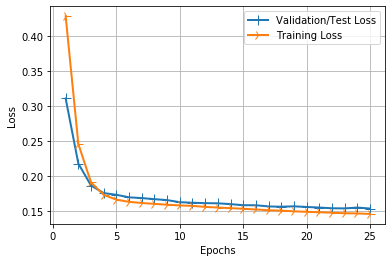

In [44]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

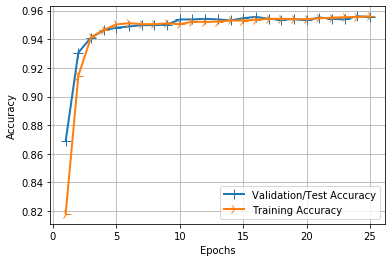

In [45]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Displaying the Classification Report and Confusion Matrix

In [46]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3302   89]
 [ 112  997]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3391
           1       0.92      0.90      0.91      1109

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



# Let's a Deeper Model

In [47]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training our Deeper Model

In [49]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 10499 samples, validate on 4500 samples
Epoch 1/25
10499/10499 [==============================] - 4s 402us/sample - loss: 0.6367 - accuracy: 0.9128 - val_loss: 0.2812 - val_accuracy: 0.9473
Epoch 2/25
10499/10499 [==============================] - 4s 344us/sample - loss: 0.2767 - accuracy: 0.9391 - val_loss: 0.2572 - val_accuracy: 0.9442
Epoch 3/25
10499/10499 [==============================] - 4s 346us/sample - loss: 0.2598 - accuracy: 0.9414 - val_loss: 0.2463 - val_accuracy: 0.9424
Epoch 4/25
10499/10499 [==============================] - 4s 348us/sample - loss: 0.2535 - accuracy: 0.9420 - val_loss: 0.2430 - val_accuracy: 0.9511
Epoch 5/25
10499/10499 [==============================] - 4s 341us/sample - loss: 0.2500 - accuracy: 0.9436 - val_loss: 0.2401 - val_accuracy: 0.9480
Epoch 6/25
10499/10499 [==============================] - 4s 341us/sample - loss: 0.2460 - accuracy: 0.9432 - val_loss: 0.2288 - val_accuracy: 0.9487
Epoch 7/25
10499/10499 [===========================

In [50]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[3323   68]
 [ 152  957]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3391
           1       0.93      0.86      0.90      1109

    accuracy                           0.95      4500
   macro avg       0.94      0.92      0.93      4500
weighted avg       0.95      0.95      0.95      4500

